<a href="https://colab.research.google.com/github/good-thinking/easy-coding2/blob/main/01_04(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pingouin
!pip install scikit_posthocs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.0/188.0 KB 5.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 65.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pingouin: filename=pingouin-0.5.3-py3-none-any.whl size=198588 sha256=187f3f11f3d868ed28b505e651611d2d01efb8004a5b581897eadc424cdad1ac
  Stored in directory: /root/.cache/pip/wheels/60/1e/21/710be95d0c93ea9ac3c0e6bacd8cce492ad5dd26bf3aedc4bf
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7047 sha256=8513bc74f758957f64c2c2cc8eefe44632f7cb70da8b50d00072c16ac6460dbd
  Stored in directory: /root/.cache/pip/wheels/6a/33/c4/0ef84d7f5568c2823e3d63a6e08988852fb9e4bc822034870a
Successfully built pingouin littleuti

In [2]:
import pandas as pd
import scipy as sp
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [4]:
df = pd.read_csv("/content/drive/MyDrive/파이썬/일일_RAWDATA(1월CSV).csv",encoding = "UTF-8")
df

,월별,광고매체,광고상품,구분2,구분3,노출수,클릭수,총전환건수★,총매출액★,간접전환건수,간접매출액,직접전환건수,직접매출액,광고비_매체기준,광고비용(VAT포함)
0,01월,구글검색,구글검색_MO,NaN,NaN,3108.0,96.0,8.0,408780.0,1.0,17983.0,7.0,390797.0,43942.0,55587.0
1,01월,구글검색,구글검색_PC,NaN,NaN,1955.0,61.0,11.0,482833.0,3.0,172205.0,8.0,310628.0,104159.0,131761.0
2,01월,네이버검색,네이버검색_MO,NaN,NaN,203676.0,355.0,3.0,80433.0,1.0,15996.0,2.0,64437.0,157685.0,157685.0
3,01월,네이버검색,네이버검색_PC,NaN,NaN,46269.0,88.0,4.0,205470.0,0.0,0.0,4.0,205470.0,52107.0,52107.0
4,01월,네이버브랜드검색,네이버브랜드검색_MO,NaN,NaN,1355.0,241.0,37.0,1087605.0,26.0,588423.0,11.0,499182.0,128400.0,128400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23335,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df2 =  df.dropna(axis=0)
df2

,월별,광고매체,광고상품,구분2,구분3,노출수,클릭수,총전환건수★,총매출액★,간접전환건수,간접매출액,직접전환건수,직접매출액,광고비_매체기준,광고비용(VAT포함)
8820,01월,구글검색,구글검색_MO,매체,일반,931.0,75.0,9.0,356149.0,0.0,0.0,0.0,0.0,16923.0,21408.0
8821,01월,구글검색,구글검색_PC,매체,일반,168.0,32.0,4.0,108436.0,0.0,0.0,0.0,0.0,16800.0,21252.0
8822,01월,네이버검색,네이버검색_MO,매체,일반,91156.0,351.0,1.0,32880.0,0.0,0.0,1.0,32880.0,146520.0,146520.0
8823,01월,네이버검색,네이버검색_PC,매체,일반,61166.0,224.0,6.0,322490.0,3.0,219604.0,3.0,102886.0,101772.0,101772.0
8824,01월,네이버브랜드검색,네이버브랜드검색_MO,매체,일반,2345.0,180.0,14.0,575375.0,7.0,284868.0,7.0,290507.0,286000.0,286000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10210,01월,GFA,설_GFA,브랜치,설,0.0,0.0,1.0,110365.0,0.0,0.0,0.0,0.0,0.0,0.0
10211,01월,리머지,설_리머지,브랜치,설,0.0,0.0,264.0,20789944.0,0.0,0.0,0.0,0.0,0.0,0.0
10212,01월,카울리,설_카울리,브랜치,설,0.0,0.0,98.0,7313387.0,0.0,0.0,0.0,0.0,0.0,0.0
10213,01월,카카오모먼트,설_카카오모먼트_MO,브랜치,설,0.0,0.0,110.0,7511616.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
df3 = pd.DataFrame(data = df2)

BP(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fbec071a280>, lines={'whiskers': [<matplotlib.lines.Line2D object at 0x7fbec06e7eb0>, <matplotlib.lines.Line2D object at 0x7fbec0692250>], 'caps': [<matplotlib.lines.Line2D object at 0x7fbec06925b0>, <matplotlib.lines.Line2D object at 0x7fbec0692910>], 'boxes': [<matplotlib.lines.Line2D object at 0x7fbec06e7b50>], 'medians': [<matplotlib.lines.Line2D object at 0x7fbec0692c70>], 'fliers': [<matplotlib.lines.Line2D object at 0x7fbec0692f70>], 'means': []})

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52509 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50529 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 52509 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_te

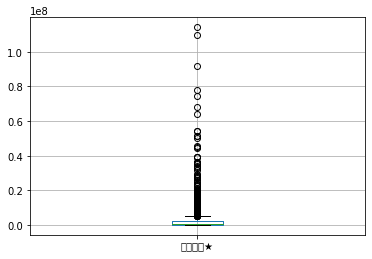

In [9]:
df3.boxplot(column = "총매출액★", return_type = "both")

In [12]:
upper_0 = df3[df3["총매출액★"] > 0]
df4 = upper_0
df4

,월별,광고매체,광고상품,구분2,구분3,노출수,클릭수,총전환건수★,총매출액★,간접전환건수,간접매출액,직접전환건수,직접매출액,광고비_매체기준,광고비용(VAT포함)
8820,01월,구글검색,구글검색_MO,매체,일반,931.0,75.0,9.0,356149.0,0.0,0.0,0.0,0.0,16923.0,21408.0
8821,01월,구글검색,구글검색_PC,매체,일반,168.0,32.0,4.0,108436.0,0.0,0.0,0.0,0.0,16800.0,21252.0
8822,01월,네이버검색,네이버검색_MO,매체,일반,91156.0,351.0,1.0,32880.0,0.0,0.0,1.0,32880.0,146520.0,146520.0
8823,01월,네이버검색,네이버검색_PC,매체,일반,61166.0,224.0,6.0,322490.0,3.0,219604.0,3.0,102886.0,101772.0,101772.0
8824,01월,네이버브랜드검색,네이버브랜드검색_MO,매체,일반,2345.0,180.0,14.0,575375.0,7.0,284868.0,7.0,290507.0,286000.0,286000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10210,01월,GFA,설_GFA,브랜치,설,0.0,0.0,1.0,110365.0,0.0,0.0,0.0,0.0,0.0,0.0
10211,01월,리머지,설_리머지,브랜치,설,0.0,0.0,264.0,20789944.0,0.0,0.0,0.0,0.0,0.0,0.0
10212,01월,카울리,설_카울리,브랜치,설,0.0,0.0,98.0,7313387.0,0.0,0.0,0.0,0.0,0.0,0.0
10213,01월,카카오모먼트,설_카카오모먼트_MO,브랜치,설,0.0,0.0,110.0,7511616.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
upper_01 = df4[df4["클릭수"] > 0]
df5 = upper_01
df5

,월별,광고매체,광고상품,구분2,구분3,노출수,클릭수,총전환건수★,총매출액★,간접전환건수,간접매출액,직접전환건수,직접매출액,광고비_매체기준,광고비용(VAT포함)
8820,01월,구글검색,구글검색_MO,매체,일반,931.0,75.0,9.0,356149.0,0.0,0.0,0.0,0.0,16923.0,21408.0
8821,01월,구글검색,구글검색_PC,매체,일반,168.0,32.0,4.0,108436.0,0.0,0.0,0.0,0.0,16800.0,21252.0
8822,01월,네이버검색,네이버검색_MO,매체,일반,91156.0,351.0,1.0,32880.0,0.0,0.0,1.0,32880.0,146520.0,146520.0
8823,01월,네이버검색,네이버검색_PC,매체,일반,61166.0,224.0,6.0,322490.0,3.0,219604.0,3.0,102886.0,101772.0,101772.0
8824,01월,네이버브랜드검색,네이버브랜드검색_MO,매체,일반,2345.0,180.0,14.0,575375.0,7.0,284868.0,7.0,290507.0,286000.0,286000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10203,01월,페이스북,설_페이스북,매체,설,101068.0,1235.0,412.0,23736986.0,0.0,0.0,0.0,0.0,1473750.0,1864294.0
10205,01월,크리테오,크리테오_CCA,매체,일반,267000.0,731.0,3.0,68435.0,0.0,0.0,0.0,0.0,65450.0,71995.0
10206,01월,크리테오,크리테오_LF,매체,일반,160638.0,961.0,97.0,12358389.0,0.0,0.0,0.0,0.0,108098.0,118908.0
10207,01월,페이스북,페이스북,매체,일반,9026.0,140.0,7.0,252205.0,0.0,0.0,0.0,0.0,56625.0,71630.0


BP(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7fbec010adf0>, lines={'whiskers': [<matplotlib.lines.Line2D object at 0x7fbec067ce20>, <matplotlib.lines.Line2D object at 0x7fbec019c190>], 'caps': [<matplotlib.lines.Line2D object at 0x7fbec019c850>, <matplotlib.lines.Line2D object at 0x7fbec00f39d0>], 'boxes': [<matplotlib.lines.Line2D object at 0x7fbec067cc70>], 'medians': [<matplotlib.lines.Line2D object at 0x7fbec072e790>], 'fliers': [<matplotlib.lines.Line2D object at 0x7fbec072e040>], 'means': []})

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53364 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47533 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 53364 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47533 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text

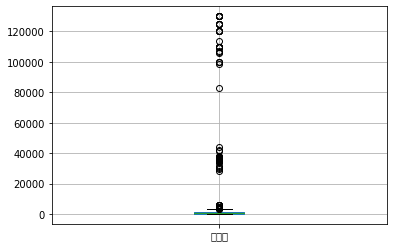

In [16]:
df5.boxplot(column = "클릭수", return_type = "both")

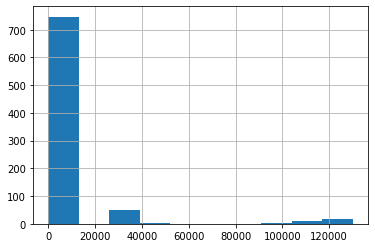

In [17]:
df5["클릭수"].hist()

In [18]:
q1 = df5["클릭수"].quantile(q=0.25)
print(q1)
q3 = df5["클릭수"].quantile(q=0.75)
print(q3)
IQR =   q3 - q1
IQR

141.0
1351.0


1210.0

In [19]:
data_IQR = df5[(df5["클릭수"] < q3 +IQR *1.5 )& (df5["클릭수"] > q1 - IQR *1.5)]
data_IQR

,월별,광고매체,광고상품,구분2,구분3,노출수,클릭수,총전환건수★,총매출액★,간접전환건수,간접매출액,직접전환건수,직접매출액,광고비_매체기준,광고비용(VAT포함)
8820,01월,구글검색,구글검색_MO,매체,일반,931.0,75.0,9.0,356149.0,0.0,0.0,0.0,0.0,16923.0,21408.0
8821,01월,구글검색,구글검색_PC,매체,일반,168.0,32.0,4.0,108436.0,0.0,0.0,0.0,0.0,16800.0,21252.0
8822,01월,네이버검색,네이버검색_MO,매체,일반,91156.0,351.0,1.0,32880.0,0.0,0.0,1.0,32880.0,146520.0,146520.0
8823,01월,네이버검색,네이버검색_PC,매체,일반,61166.0,224.0,6.0,322490.0,3.0,219604.0,3.0,102886.0,101772.0,101772.0
8824,01월,네이버브랜드검색,네이버브랜드검색_MO,매체,일반,2345.0,180.0,14.0,575375.0,7.0,284868.0,7.0,290507.0,286000.0,286000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10202,01월,카카오모먼트,설_카카오모먼트_MO,매체,설,770693.0,2086.0,56.0,3912923.0,37.0,2238599.0,19.0,1674324.0,1204390.0,1204390.0
10203,01월,페이스북,설_페이스북,매체,설,101068.0,1235.0,412.0,23736986.0,0.0,0.0,0.0,0.0,1473750.0,1864294.0
10205,01월,크리테오,크리테오_CCA,매체,일반,267000.0,731.0,3.0,68435.0,0.0,0.0,0.0,0.0,65450.0,71995.0
10206,01월,크리테오,크리테오_LF,매체,일반,160638.0,961.0,97.0,12358389.0,0.0,0.0,0.0,0.0,108098.0,118908.0


In [21]:
df6 = data_IQR
df6

,월별,광고매체,광고상품,구분2,구분3,노출수,클릭수,총전환건수★,총매출액★,간접전환건수,간접매출액,직접전환건수,직접매출액,광고비_매체기준,광고비용(VAT포함)
8820,01월,구글검색,구글검색_MO,매체,일반,931.0,75.0,9.0,356149.0,0.0,0.0,0.0,0.0,16923.0,21408.0
8821,01월,구글검색,구글검색_PC,매체,일반,168.0,32.0,4.0,108436.0,0.0,0.0,0.0,0.0,16800.0,21252.0
8822,01월,네이버검색,네이버검색_MO,매체,일반,91156.0,351.0,1.0,32880.0,0.0,0.0,1.0,32880.0,146520.0,146520.0
8823,01월,네이버검색,네이버검색_PC,매체,일반,61166.0,224.0,6.0,322490.0,3.0,219604.0,3.0,102886.0,101772.0,101772.0
8824,01월,네이버브랜드검색,네이버브랜드검색_MO,매체,일반,2345.0,180.0,14.0,575375.0,7.0,284868.0,7.0,290507.0,286000.0,286000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10202,01월,카카오모먼트,설_카카오모먼트_MO,매체,설,770693.0,2086.0,56.0,3912923.0,37.0,2238599.0,19.0,1674324.0,1204390.0,1204390.0
10203,01월,페이스북,설_페이스북,매체,설,101068.0,1235.0,412.0,23736986.0,0.0,0.0,0.0,0.0,1473750.0,1864294.0
10205,01월,크리테오,크리테오_CCA,매체,일반,267000.0,731.0,3.0,68435.0,0.0,0.0,0.0,0.0,65450.0,71995.0
10206,01월,크리테오,크리테오_LF,매체,일반,160638.0,961.0,97.0,12358389.0,0.0,0.0,0.0,0.0,108098.0,118908.0


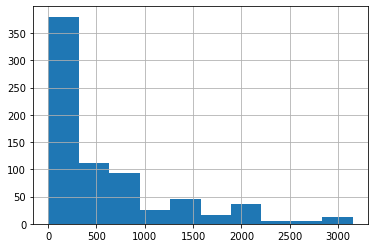

In [22]:
df6["클릭수"].hist()

In [23]:
q11 = df6["클릭수"].quantile(q=0.25)
print(q11)
q33 = df6["클릭수"].quantile(q=0.75)
print(q33)
IQR2 =   q33 - q11
IQR2

115.75
773.5


657.75

In [29]:
data_IQR2 = df6[(df6["클릭수"] < q33 +IQR2 *1.5 )& (df6["클릭수"] > q11 - IQR2 *1.5)]
data_IQR2

,월별,광고매체,광고상품,구분2,구분3,노출수,클릭수,총전환건수★,총매출액★,간접전환건수,간접매출액,직접전환건수,직접매출액,광고비_매체기준,광고비용(VAT포함)
8820,01월,구글검색,구글검색_MO,매체,일반,931.0,75.0,9.0,356149.0,0.0,0.0,0.0,0.0,16923.0,21408.0
8821,01월,구글검색,구글검색_PC,매체,일반,168.0,32.0,4.0,108436.0,0.0,0.0,0.0,0.0,16800.0,21252.0
8822,01월,네이버검색,네이버검색_MO,매체,일반,91156.0,351.0,1.0,32880.0,0.0,0.0,1.0,32880.0,146520.0,146520.0
8823,01월,네이버검색,네이버검색_PC,매체,일반,61166.0,224.0,6.0,322490.0,3.0,219604.0,3.0,102886.0,101772.0,101772.0
8824,01월,네이버브랜드검색,네이버브랜드검색_MO,매체,일반,2345.0,180.0,14.0,575375.0,7.0,284868.0,7.0,290507.0,286000.0,286000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10196,01월,모비온,모비온배너_PC,매체,일반,55128.0,107.0,5.0,416151.0,3.0,250007.0,2.0,166144.0,16646.0,18311.0
10203,01월,페이스북,설_페이스북,매체,설,101068.0,1235.0,412.0,23736986.0,0.0,0.0,0.0,0.0,1473750.0,1864294.0
10205,01월,크리테오,크리테오_CCA,매체,일반,267000.0,731.0,3.0,68435.0,0.0,0.0,0.0,0.0,65450.0,71995.0
10206,01월,크리테오,크리테오_LF,매체,일반,160638.0,961.0,97.0,12358389.0,0.0,0.0,0.0,0.0,108098.0,118908.0


In [30]:
df7 = data_IQR2
df7

,월별,광고매체,광고상품,구분2,구분3,노출수,클릭수,총전환건수★,총매출액★,간접전환건수,간접매출액,직접전환건수,직접매출액,광고비_매체기준,광고비용(VAT포함)
8820,01월,구글검색,구글검색_MO,매체,일반,931.0,75.0,9.0,356149.0,0.0,0.0,0.0,0.0,16923.0,21408.0
8821,01월,구글검색,구글검색_PC,매체,일반,168.0,32.0,4.0,108436.0,0.0,0.0,0.0,0.0,16800.0,21252.0
8822,01월,네이버검색,네이버검색_MO,매체,일반,91156.0,351.0,1.0,32880.0,0.0,0.0,1.0,32880.0,146520.0,146520.0
8823,01월,네이버검색,네이버검색_PC,매체,일반,61166.0,224.0,6.0,322490.0,3.0,219604.0,3.0,102886.0,101772.0,101772.0
8824,01월,네이버브랜드검색,네이버브랜드검색_MO,매체,일반,2345.0,180.0,14.0,575375.0,7.0,284868.0,7.0,290507.0,286000.0,286000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10196,01월,모비온,모비온배너_PC,매체,일반,55128.0,107.0,5.0,416151.0,3.0,250007.0,2.0,166144.0,16646.0,18311.0
10203,01월,페이스북,설_페이스북,매체,설,101068.0,1235.0,412.0,23736986.0,0.0,0.0,0.0,0.0,1473750.0,1864294.0
10205,01월,크리테오,크리테오_CCA,매체,일반,267000.0,731.0,3.0,68435.0,0.0,0.0,0.0,0.0,65450.0,71995.0
10206,01월,크리테오,크리테오_LF,매체,일반,160638.0,961.0,97.0,12358389.0,0.0,0.0,0.0,0.0,108098.0,118908.0


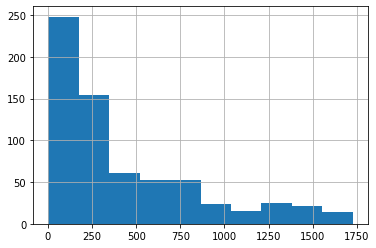

In [31]:
df7["클릭수"].hist()

In [170]:
df8 = df7[["클릭수", "총매출액★"]]
df8

,클릭수,총매출액★
8820,75.000,356149.000
8821,32.000,108436.000
8822,351.000,32880.000
8823,224.000,322490.000
8824,180.000,575375.000
...,...,...
10196,107.000,416151.000
10203,1235.000,23736986.000
10205,731.000,68435.000
10206,961.000,12358389.000


In [171]:
df8.reset_index()

,index,클릭수,총매출액★
0,8820,75.000,356149.000
1,8821,32.000,108436.000
2,8822,351.000,32880.000
3,8823,224.000,322490.000
4,8824,180.000,575375.000
...,...,...,...
662,10196,107.000,416151.000
663,10203,1235.000,23736986.000
664,10205,731.000,68435.000
665,10206,961.000,12358389.000


In [172]:
df8

,클릭수,총매출액★
8820,75.000,356149.000
8821,32.000,108436.000
8822,351.000,32880.000
8823,224.000,322490.000
8824,180.000,575375.000
...,...,...
10196,107.000,416151.000
10203,1235.000,23736986.000
10205,731.000,68435.000
10206,961.000,12358389.000


In [173]:
for i in range(667):
  if df8.iloc[i]["클릭수"] < 250 :  df8.iloc[i]["클릭수"] = 0
  elif df8.iloc[i]["클릭수"] < 500 : df8.iloc[i]["클릭수"] = 1
  elif df8.iloc[i]["클릭수"] < 750 : df8.iloc[i]["클릭수"] = 2
  elif df8.iloc[i]["클릭수"] < 1000 : df8.iloc[i]["클릭수"] = 3
  elif df8.iloc[i]["클릭수"] < 1250 : df8.iloc[i]["클릭수"] = 4
  elif df8.iloc[i]["클릭수"] < 1750 : df8.iloc[i]["클릭수"] = 5
  else : df8.iloc[0]["클릭수"] = 6

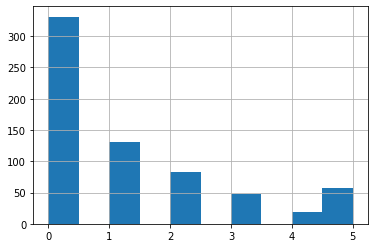

In [174]:
df8["클릭수"].hist()

In [175]:
df9 = df8.rename(columns={'총매출액★': 'total_sales', '클릭수' : 'click_number',}, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [176]:
df8

,click_number,total_sales
8820,0.000,356149.000
8821,0.000,108436.000
8822,1.000,32880.000
8823,0.000,322490.000
8824,0.000,575375.000
...,...,...
10196,0.000,416151.000
10203,4.000,23736986.000
10205,2.000,68435.000
10206,3.000,12358389.000


In [177]:
pd.options.display.float_format = '{:.3f}'.format
type2 = []

In [178]:
for i in range(0,6) :
  print(i)
  type2.append(df8[df8. click_number == i]. total_sales)

0
1
2
3
4
5


In [179]:
sp.stats.levene(type2[0], type2[1], type2[2], type2[3], type2[4],type2[5])  #등분산 분석 : 등분산이다(귀무), 등분산 아니다(대립)

LeveneResult(statistic=22.967890570263542, pvalue=2.699616600446205e-21)

In [180]:
import pingouin as pg

In [181]:
pg.welch_anova(dv = "total_sales", between ="click_number", data = df8) #등분산이 아닌 경우.
#귀무가설 : 클릭구간당 충매출액 평균이 같다. 
#대립가설 : 클릭구간당 별로 총매출액 평균이 다르다. 

,Source,ddof1,ddof2,F,p-unc,np2
0,click_number,5,104.072,16.684,0.000,0.175


In [182]:
print(df8.groupby("click_number").mean())

              total_sales
click_number             
0.000         1042812.828
1.000         1862251.277
2.000         6223447.512
3.000         4448824.958
4.000         7134760.895
5.000         3781898.579


In [169]:
print(df8.groupby("click_number").mean())
# 0 = 0~250
# 1 = 250 ~ 500
# 2 = 500 ~ 750
# 3 = 750 ~ 1000
 #4 = 1000~1250
 #5 = 1250 ~ 1500

              total_sales
click_number             
0.000         1042812.828
1.000         1862251.277
2.000         6223447.512
3.000         4448824.958
4.000         7134760.895
5.000         3781898.579
